In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# read data from excel file
weather = pd.read_excel("~/Desktop/RDUweather.xlsx")

In [2]:
# extract data from date variable
weather['year'] = weather['Date'].dt.year
weather['month'] = weather['Date'].dt.month
weather['day'] = weather['Date'].dt.day

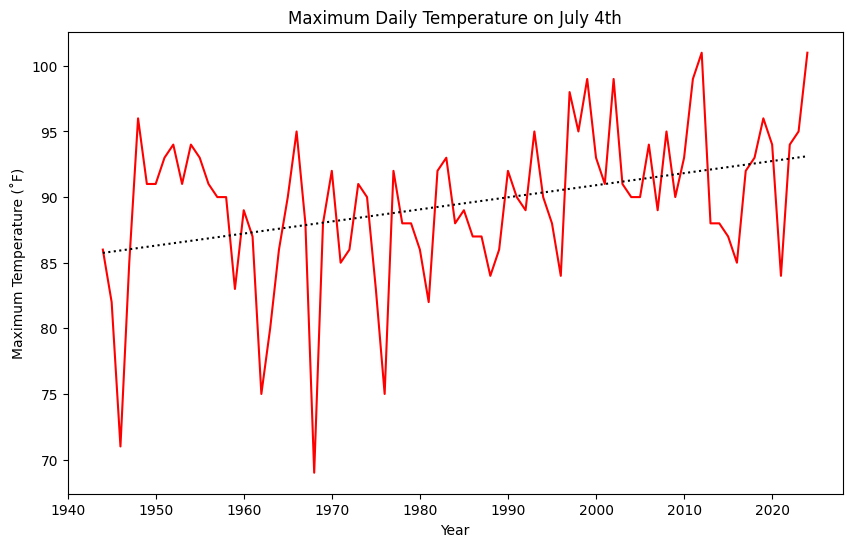

In [3]:
# Plot Daily Max Temp on 7/4 by Year
weather_jul4 = weather[(weather['day']==4) & (weather['month']==7)]

plt.figure(figsize=(10,6))
plt.title("Maximum Daily Temperature on July 4th")

plt.plot(weather_jul4['year'],weather_jul4['TMAX'], color='red')
plt.xlabel("Year")
plt.ylabel("Maximum Temperature (˚F)")

coeffs = np.polyfit(weather_jul4['year'], weather_jul4['TMAX'], 1)
regression_line = np.poly1d(coeffs)
plt.plot(weather_jul4['year'], regression_line(weather_jul4['year']), color='black', linestyle='dotted', label='Trend')

plt.show()

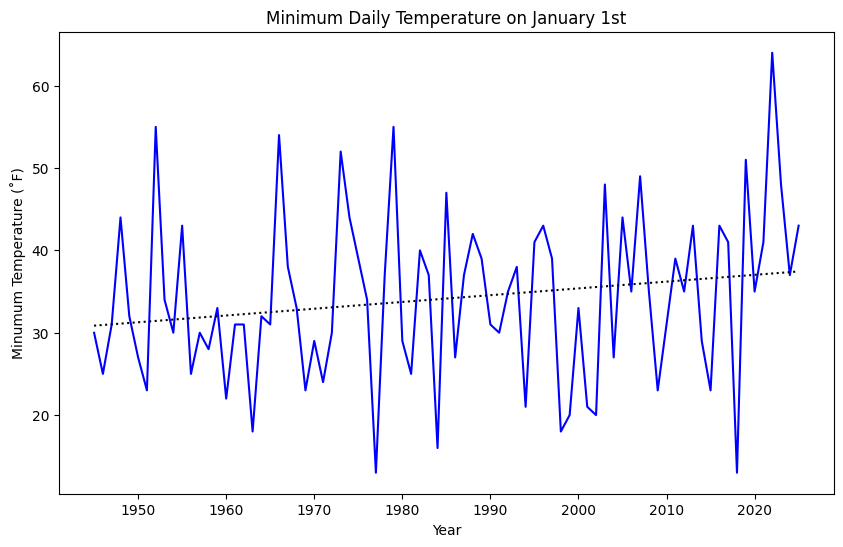

In [4]:
# Plot Daily Min Temp on 1/1 by Year
weather_jan1 = weather[(weather['day']==1) & (weather['month']==1)]

plt.figure(figsize=(10,6))
plt.title("Minimum Daily Temperature on January 1st")

plt.plot(weather_jan1['year'],weather_jan1['TMIN'], color='blue')
plt.xlabel("Year")
plt.ylabel("Minumum Temperature (˚F)")

coeffs = np.polyfit(weather_jan1['year'], weather_jan1['TMIN'], 1)
regression_line = np.poly1d(coeffs)
plt.plot(weather_jan1['year'], regression_line(weather_jan1['year']), color='black', linestyle='dotted', label='Trend')

plt.show()

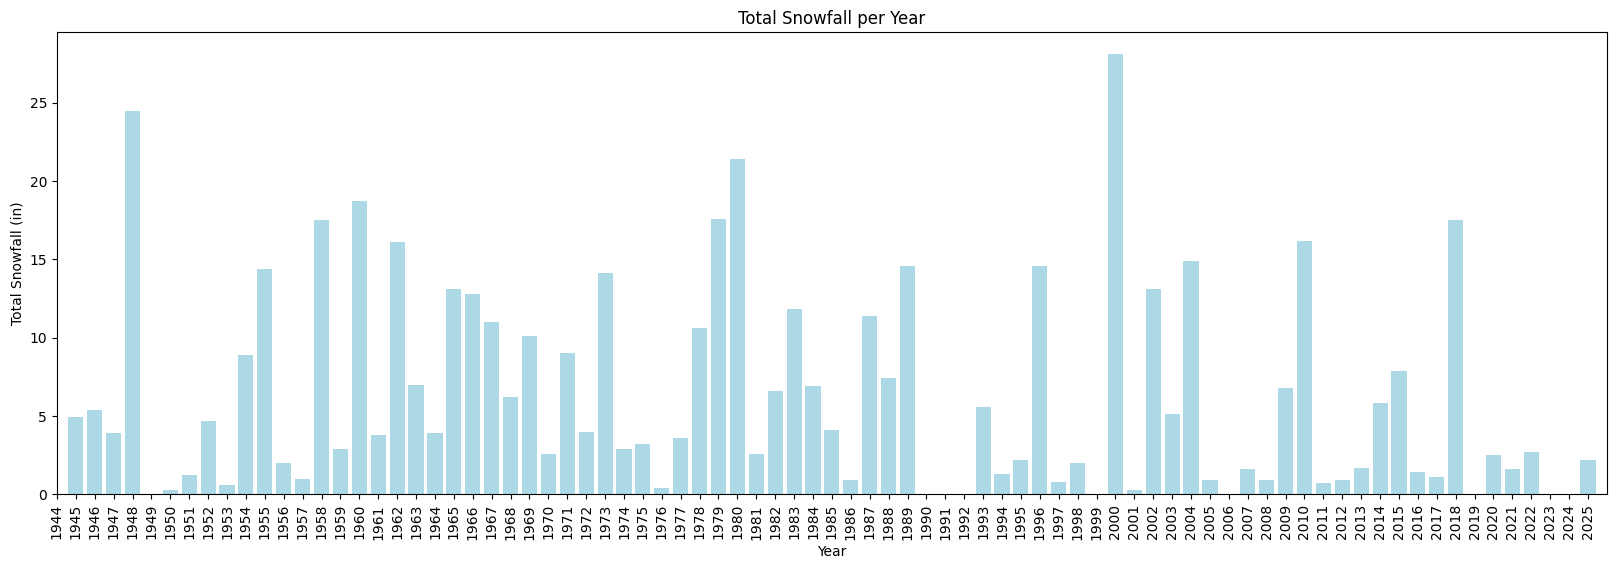

In [5]:
# Plot Yearly Snowfall
year_snow_totals = weather.groupby('year', as_index=False)['SNOW'].sum()

plt.figure(figsize=(20,6))
plt.title('Total Snowfall per Year')

plt.bar(year_snow_totals['year'], year_snow_totals['SNOW'], color='lightblue')
plt.xlabel('Year')
plt.xticks(year_snow_totals['year'], rotation='vertical')
plt.xlim(1944, 2026)
plt.ylabel('Total Snowfall (in)')
plt.show()

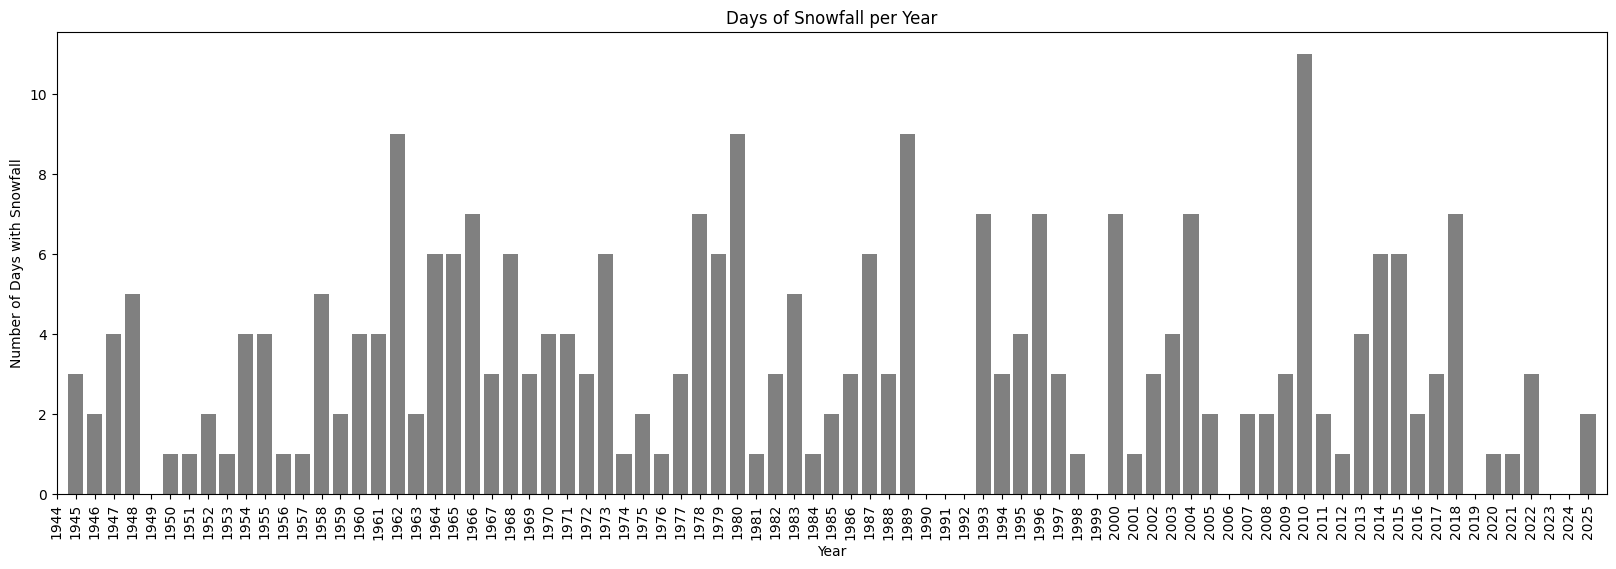

In [6]:
# Plot Snow Days by Year
snow_days = weather[(weather['SNOW']>0)].groupby('year', as_index=False)['day'].count()

plt.figure(figsize=(20,6))
plt.title('Days of Snowfall per Year')

plt.bar(snow_days['year'], snow_days['day'], color='gray')
plt.xlabel('Year')
plt.xticks(year_snow_totals['year'], rotation='vertical')
plt.xlim(1944, 2026)
plt.ylabel('Number of Days with Snowfall')
plt.show()